In [109]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('./HR(已修改）.csv')

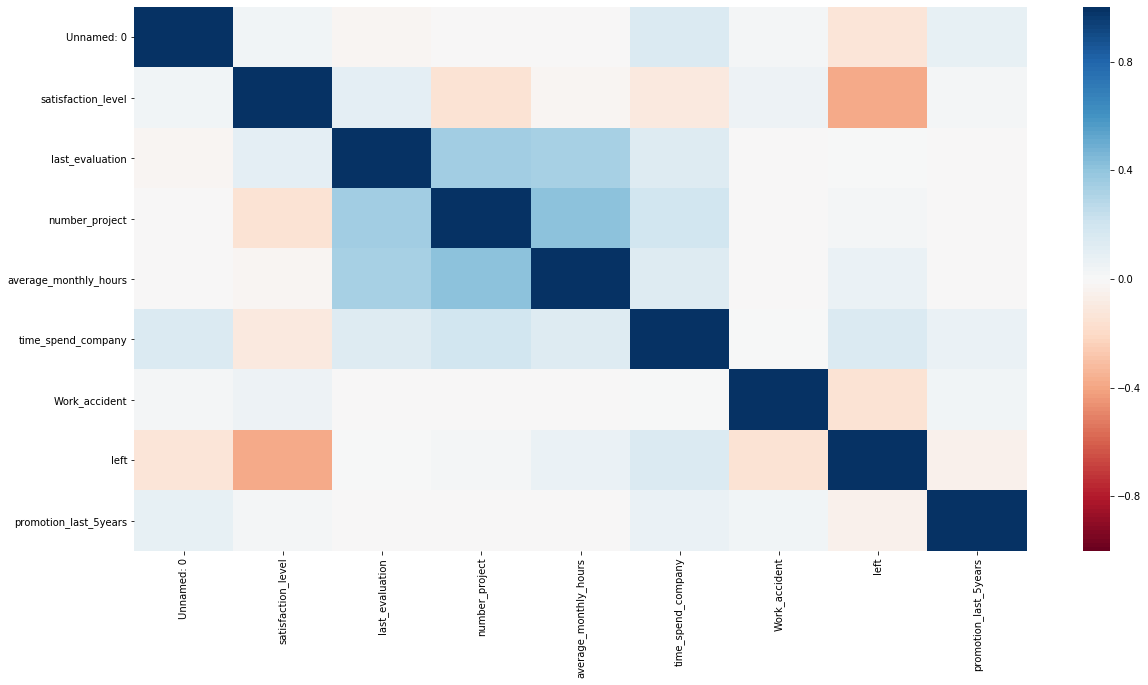

In [15]:
sns.set_context(font_scale = 1.5)
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),vmin = -1,vmax = 1, cmap = sns.color_palette('RdBu',n_colors = 128))#相关热力图

In [60]:
s1 = pd.Series(['X1','X1','X2','X2','X2','X2'])
s2 = pd.Series(['Y1','Y1','Y1','Y2','Y2','Y2'])

In [83]:
def getEntropy(s):
    if not isinstance(s,pd.core.series.Series):
        s = pd.Series(s)
    prt_ary = s.groupby(s).count().values/float(len(s))#得到概率分布
    return -(np.log2(prt_ary)*prt_ary).sum()

In [84]:
getEntropy(s1)#求熵

0.9182958340544896

In [85]:
getEntropy(s2)#求熵

1.0

In [86]:
def getCondEntropy(s1,s2):#求条件熵 s1下s2的条件熵 所以我们要先求出s1的分布
    d = dict()
    for i in list(range(len(s1))):
        d[s1[i]] = d.get(s1[i],[])+[s2[i]]#？？？
    return sum([getEntropy(d[k])*len(d[k])/float(len(s1)) for k in d])

In [87]:
getCondEntropy(s1,s2)#条件熵

0.5408520829727552

In [88]:
getCondEntropy(s2,s1)#条件熵

0.4591479170272448

In [90]:
def getEntropyGain(s1,s2):#互信息（熵增益）
    return getEntropy(s2)-getCondEntropy(s1,s2)

In [91]:
getEntropyGain(s1,s2)

0.4591479170272448

In [92]:
getEntropyGain(s2,s1)

0.4591479170272448

In [93]:
def getEntropyGainRatio(s1,s2):#熵增益率
    return getEntropyGain(s1,s2)/getEntropy(s2)

In [94]:
getEntropyGainRatio(s1,s2)

0.4591479170272448

In [95]:
getEntropyGainRatio(s2,s1)

0.5

In [97]:
#衡量离散值的相关性
import math
def getDiscreteCorr(s1,s2):
    return getEntropyGain(s1,s2)/math.sqrt(getEntropy(s1)*getEntropy(s2))

In [98]:
getDiscreteCorr(s1,s2)#离散值之间的相关性度量

0.4791387674918639

In [99]:
getDiscreteCorr(s2,s1)

0.4791387674918639

In [101]:
#Gini系数
def getProbSS(s):
    if not isinstance(s,pd.core.series.Series):
        s = pd.Series(s)
    prt_ary = s.groupby(s).count().values/float(len(s))#得到概率分布
    return sum(prt_ary**2)
def getGini(s1,s2):
    d = dict()
    for i in list(range(len(s1))):
        d[s1[i]] = d.get(s1[i],[])+[s2[i]]
    return 1-sum([getProbSS(d[k])*len(d[k])/float(len(s1)) for k in d])

In [102]:
getGini(s1,s2)

0.25

In [103]:
getGini(s2,s1)#对换后数值不一样，所以不是对称的

0.2222222222222222